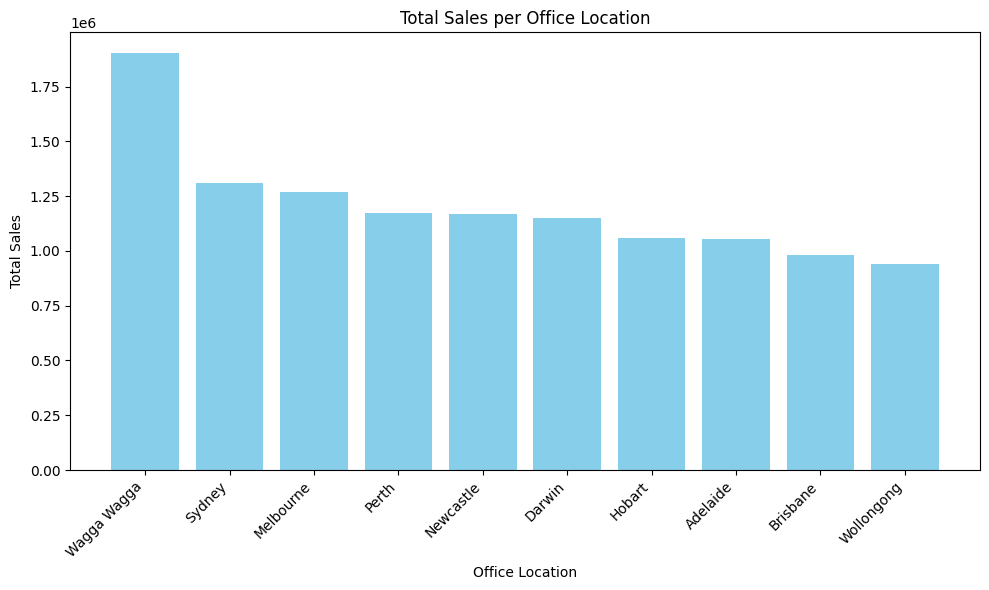

In [1]:
import matplotlib.pyplot as plt

# Data
office_locations = [
    "Wagga Wagga", "Sydney", "Melbourne", "Perth",
    "Newcastle", "Darwin", "Hobart", "Adelaide",
    "Brisbane", "Wollongong"
]
total_sales = [
    1902270.84506345, 1309222.54653215, 1270296.59834337,
    1171929.89663243, 1167716.59752154, 1150447.24776626,
    1059141.64758062, 1054211.89686036, 983439.447916031,
    938812.297796726
]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(office_locations, total_sales, color='skyblue')

# Rotate x-labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Total Sales per Office Location')
plt.xlabel('Office Location')
plt.ylabel('Total Sales')

# Show the plot
plt.tight_layout()
plt.show()


In [4]:
data = [
    (24865.0499053001, 'Anna', 'Kelly'),
    (22632.0500130653, 'Joseph', 'Reed'),
    (21897.1998960972, 'Jake', 'Cox')
]


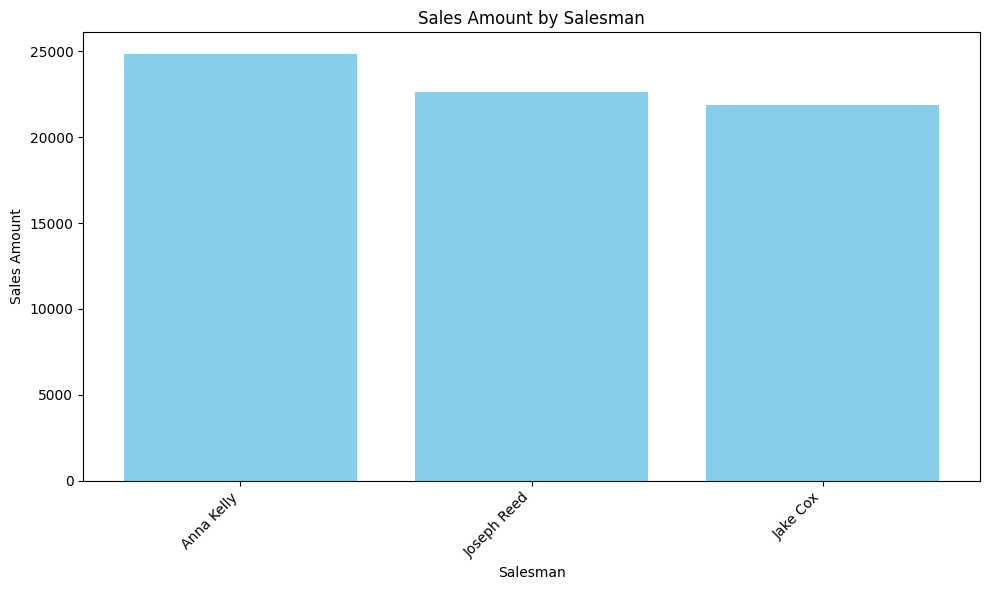

In [5]:
import matplotlib.pyplot as plt

# Extracting the data for plotting
sales = [item[0] for item in data]
salesmen = [f"{item[1]} {item[2]}" for item in data]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(salesmen, sales, color='skyblue')

# Set labels and title
plt.xlabel('Salesman')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Salesman')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


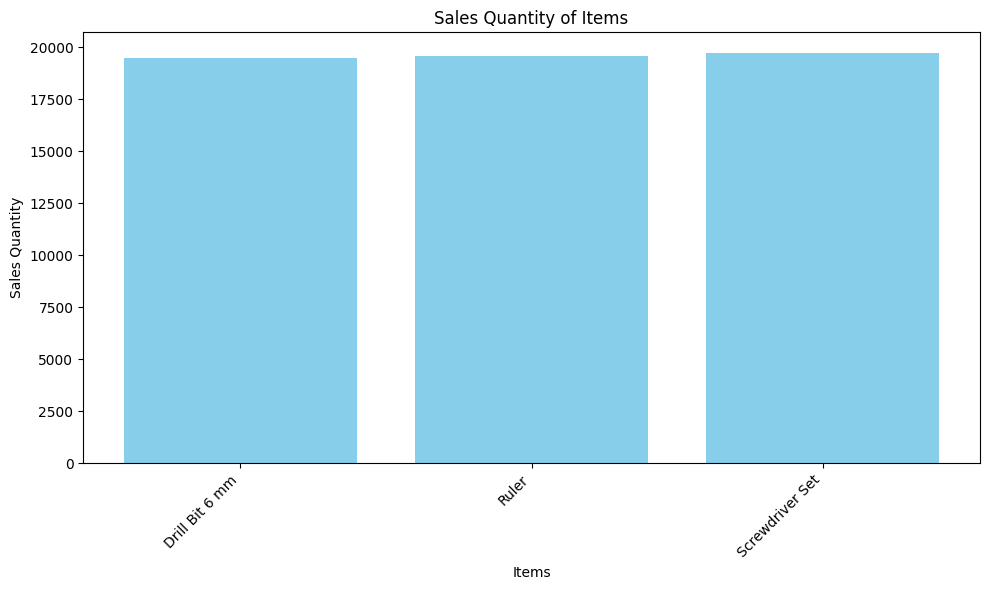

In [6]:
import matplotlib.pyplot as plt

# Provided data: id, description, and sales quantity
data = [
    (23, 'Drill Bit 6 mm', 19481),
    (13, 'Ruler', 19613),
    (2, 'Screwdriver Set', 19741)
]

# Extracting individual data points
ids = [item[0] for item in data]
descriptions = [item[1] for item in data]
sales_quantity = [item[2] for item in data]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(descriptions, sales_quantity, color='skyblue')

# Adding labels and titles
plt.xlabel('Items')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity of Items')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


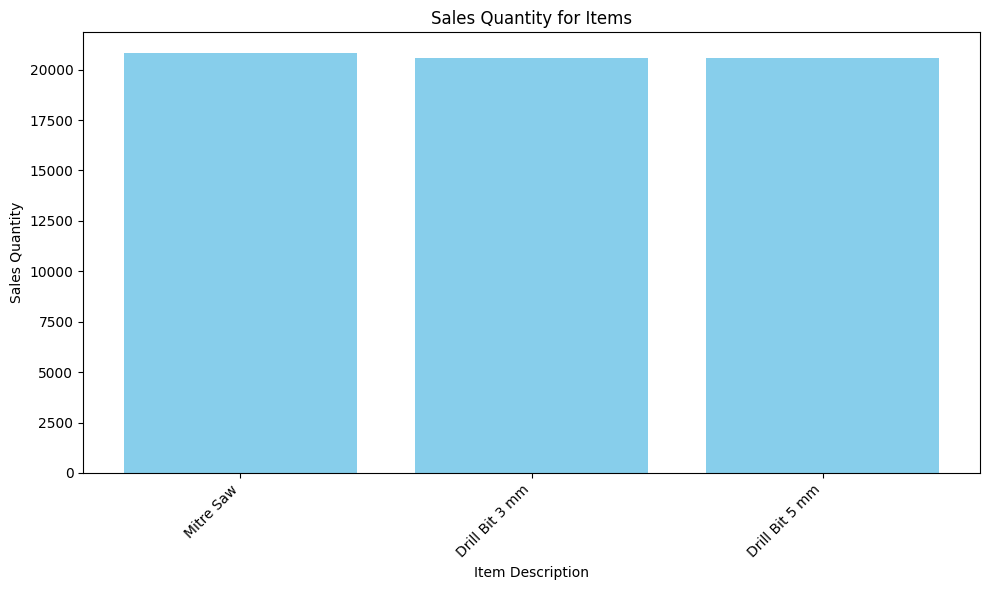

In [7]:
import matplotlib.pyplot as plt

# Sample data
data = [
    (7, 'Mitre Saw', 20811),
    (20, 'Drill Bit 3 mm', 20586),
    (22, 'Drill Bit 5 mm', 20577)
]

# Extracting item descriptions and sales quantities
descriptions = [item[1] for item in data]
sales_quantity = [item[2] for item in data]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(descriptions, sales_quantity, color='skyblue')
plt.xlabel('Item Description')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity for Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset from CSV
data = pd.read_csv('/content/dataset_for_assignment.csv')

# Assuming 'Office Location' and 'Row Total' columns for prediction
sales_data = data[['Office Location', 'Row Total']]

# Group by 'Office Location' and calculate total sales for each office
total_sales = sales_data.groupby('Office Location')['Row Total'].sum().reset_index()

# Determine the maximum index present in the 'Office Location' data
max_index = total_sales.index.max()

# Adding the next year's index and assuming a new office location
next_year_index = max_index + 1
new_office_location = f"New_Location_{next_year_index}"

# Create a new dataframe with the next year's index and office location
next_year_data = pd.DataFrame({'Office Location': [new_office_location]})

# Append the next year's data to the existing 'total_sales' data
total_sales = total_sales.append(next_year_data)

# One-hot encode the 'Office Location' categorical variable
encoder = OneHotEncoder(sparse=False)
encoded_office = encoder.fit_transform(total_sales[['Office Location']])

# Create features (encoded_office) and target variable (total sales)
X = encoded_office[:-1]  # Excluding the last row (next year's data) for training
y = total_sales.iloc[:-1]['Row Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model and fit it with the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model's performance on the test set
score = model.score(X_test, y_test)
print(f"Model Score: {score}")

# Predict sales for the next year for each office
next_year_encoded = encoded_office[-1].reshape(1, -1)  # Using the last row for prediction

next_year_sales_prediction = model.predict(next_year_encoded)

# Find the office name with the highest predicted sales
predicted_office_index = next_year_sales_prediction.argmax()
best_office = total_sales.iloc[-1]  # Taking the last row as the next year's prediction

print("Sales Prediction for Next Year:")
print(f"The predicted total sales for all offices in the next year: {next_year_sales_prediction[0]:.2f}")
print("Best performing office:")
print(best_office)


<ipython-input-6-8563b114d483>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_sales = total_sales.append(next_year_data)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model Score: -0.37573553881362054
Sales Prediction for Next Year:
The predicted total sales for all offices in the next year: 1161245.87
Best performing office:
Office Location    New_Location_10
Row Total                      NaN
Name: 0, dtype: object
